# Signal Analysis

This chapter delves into the principles and methods of signal analysis, with a focus on both deterministic and random signals. 

It provides a comprehensive overview of various techniques for signal representation and examines the fundamental properties of random variables commonly encountered in communication systems. 

Additionally, the chapter explores the characteristics of random processes, including lowpass and bandpass random processes, which play a critical role in modern communication technologies.



## Baseband and Bandpass Signals

**Communication Process and Signal Translation** 
- Communication involves transmitting the output of an information source over a communication channel.
- Typically, the spectral characteristics of the information signal do **not** directly align with the spectral properties of the communication channel. As a result, the signal cannot be directly transmitted.
- Often, the information signal is a low-frequency (baseband) signal, while the communication channel operates at higher frequencies.
- To address this mismatch, the information signal is translated to a higher frequency range at the transmitter, aligning with the channel's properties.
- This translation process is called **modulation**, where the baseband signal is transformed into a **bandpass modulated signal**.

#### Baseband and Bandpass Representation
**Definition:**  
Any real, narrow-band, high-frequency signal—referred to as a **bandpass signal**—can be equivalently represented as a complex low-frequency signal, known as the **lowpass equivalent** of the bandpass signal.

#### Rationale for Lowpass Representation
Processing lowpass signals is preferred because:
- **Lower sampling rates** are required for low-frequency signals.
- This results in reduced data rates for sampled signals, simplifying signal processing algorithms and improving efficiency.

#### Example: Human Voice and Signal Transmission

**Human Voice as a Low-Frequency Signal**  
Our voice is a real-valued **low-frequency signal**, with most of its energy concentrated in the range of **300 Hz to 3.4 kHz** (commonly referred to as the speech bandwidth, approximately **3.1 kHz**). 

To transmit this voice signal over a high-frequency channel, such as Wi-Fi, we must modulate it into a **real-valued bandpass signal** that matches the channel's frequency range.

**Modulation to Bandpass Signal**  
For Wi-Fi operating at **2.4 GHz**, the modulated voice signal will be shifted to a frequency band centered around **2.4 GHz**. For example, after modulation, the signal might occupy a band from **2.39985 GHz to 2.40015 GHz**, maintaining the same bandwidth of **3.1 kHz**.

**Baseband Equivalent for Analysis**  
To facilitate signal processing and analysis:
1. The **real-valued bandpass signal** is represented as a **baseband equivalent signal**.
2. This baseband signal has both **positive and negative frequencies** centered around zero.
3. The baseband equivalent has a frequency range of **-1.55 kHz to +1.55 kHz**, with a total bandwidth of **3.1 kHz**, effectively halving the frequency range for positive frequencies compared to the original voice signal.

### Some Fundamental Signals

A signal, e.g., $ x(t) $, can also be referred to as a *function* or a *pulse*. For example, in our context, terms like "sinc signal," "sinc function," and "sinc pulse" are interchangeable.

#### Rectangular Signal
The **rectangular signal**, denoted as $\Pi(t)$, is defined as:

$$
\Pi(t) = 
\begin{cases}
1 & |t| < \frac{1}{2}, \\
\frac{1}{2} & t = \pm\frac{1}{2}, \\
0 & \text{otherwise}.
\end{cases}
$$

- Often used in baseband systems to model pulse-like signals or time-domain windows.
- It serves as a basic representation of data pulses in digital communication.

#### Sinc Signal
The **sinc function**, represented as $\text{sinc}(t)$, is defined as:

$$
\text{sinc}(t) = 
\begin{cases}
\frac{\sin(\pi t)}{\pi t} & t \neq 0, \\
1 & t = 0.
\end{cases}
$$

- The sinc function is the ideal baseband signal in frequency-domain analysis because it corresponds to a perfect rectangular pulse in the frequency domain.
- It is crucial for understanding bandwidth-limited signals and interpolation.
- The sinc function is pivotal in frequency domain analysis and is the Fourier transform of the rectangular pulse.

#### Sign Signal
The **sign function**, $\text{sgn}(t)$, is defined as:

$$
\text{sgn}(t) = 
\begin{cases}
1 & t > 0, \\
-1 & t < 0, \\
0 & t = 0.
\end{cases}
$$

- Used in representing the polarity of baseband signals.
- Commonly appears in analytical representations of signal switching or thresholding.

### Additional Signals

#### Unit Step Signal
The **unit step function**, denoted $u_{-1}(t)$, is expressed as:

$$
u_{-1}(t) = 
\begin{cases}
1 & t > 0, \\
\frac{1}{2} & t = 0, \\
0 & t < 0.
\end{cases}
$$

- Fundamental for modeling signals that start or change at a specific time, e.g., a sudden transition.
- Widely used in system analysis for determining responses to step inputs.

#### Triangular Signal
The **triangular signal**, $\Lambda(t)$, results from the convolution of two rectangular pulses:

$$
\Lambda(t) = \Pi(t) \circledast \Pi(t) = 
\begin{cases}
t + 1 & -1 \leq t < 0, \\
-t + 1 & 0 \leq t < 1, \\
0 & \text{otherwise}.
\end{cases}
$$

- Represents smoothed pulses or transitions in baseband signals.
- Frequently used in interpolation and windowing in digital signal processing.

It is noted that:
- The foundational signals can be used to represent baseband and passband signals.
- These foundational signals serve as building blocks in the analysis and representation of more complex signal behaviors in both time and frequency domains.

#### Python Simulation

**Continuous-Time Rectangular Signal**  

The rectangular signal $ \Pi(t) $ in continuous time is expressed as:

$$
\Pi(t) = 
\begin{cases} 
1 & \text{if } |t| < \frac{T}{2}, \\\\
0.5 & \text{if } |t| = \frac{T}{2}, \\\\
0 & \text{if } |t| > \frac{T}{2}.
\end{cases}
$$

**Discrete-Time Representation Using Delta Function**  

In the discrete-time simulation, the rectangular signal is represented as a sum of scaled delta functions:

$$
\Pi(t) = \Delta t \sum_{n} \delta(t - n \Delta t) \cdot a_n
$$

where:
- $\Delta t = \frac{T}{f_s}$ is the time step based on the sample rate $ f_s $.
- $a_n$ is the amplitude at each sample point $t = n \Delta t$, defined as:
  $$
  a_n =
  \begin{cases} 
  1 & \text{if } |t_n| < \frac{T}{2}, \\\\
  0.5 & \text{if } |t_n| = \frac{T}{2}, \\\\
  0 & \text{if } |t_n| > \frac{T}{2}.
  \end{cases}
  $$
- $\delta(t - n \Delta t)$ is the Dirac delta function, representing the signal at discrete times $t = n \Delta t$.

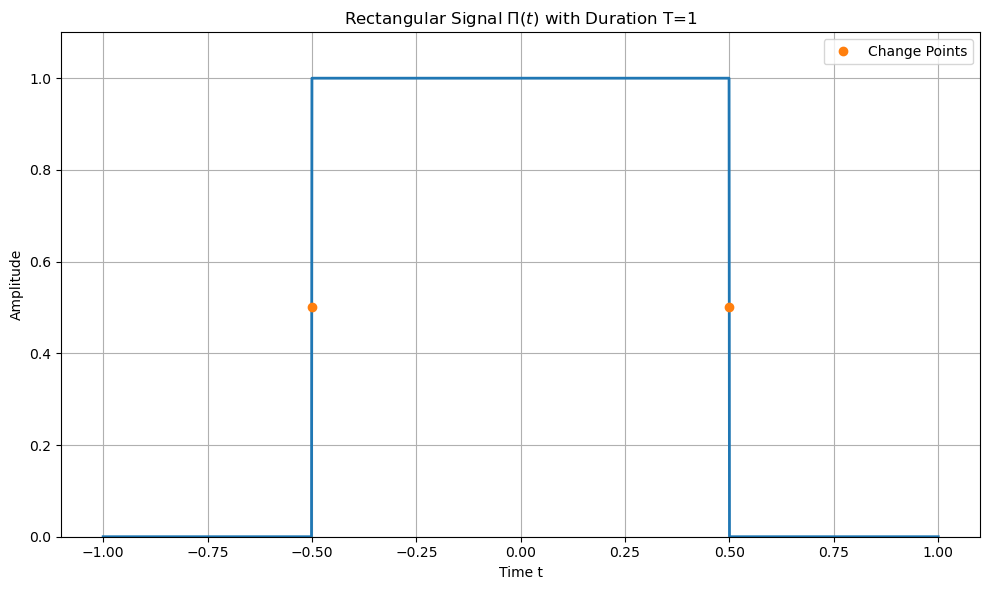

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the duration of the rectangular signal
T = 1  # Duration of the rectangular signal

# Define the sample rate
f_s = 1000  # Sample rate in Hz (samples per second)

dt = T / f_s  # Time step based on the duration and sample rate

# Define the time vector
t = np.arange(-T, T + dt, dt)  # Time vector from -T to T with step size dt

# Initialize the rectangular signal with zeros
rect_t = np.zeros_like(t)

# Apply the conditions for the rectangular pulse
rect_t[np.abs(t) < T / 2] = 1  # Set value to 1 where |t| < T/2
rect_t[np.abs(t) == T / 2] = 0.5  # Set value to 1/2 where t = ±T/2

# Plot the rectangular signal
plt.figure(figsize=(10, 6))
plt.plot(t, rect_t, linewidth=2)
plt.grid(True)
plt.title('Rectangular Signal $\\Pi(t)$ with Duration T=1')
plt.xlabel('Time t')
plt.ylabel('Amplitude')
plt.ylim([0, 1.1])
plt.plot([-T / 2, T / 2], [0.5, 0.5], 'o', linewidth=2, label='Change Points')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

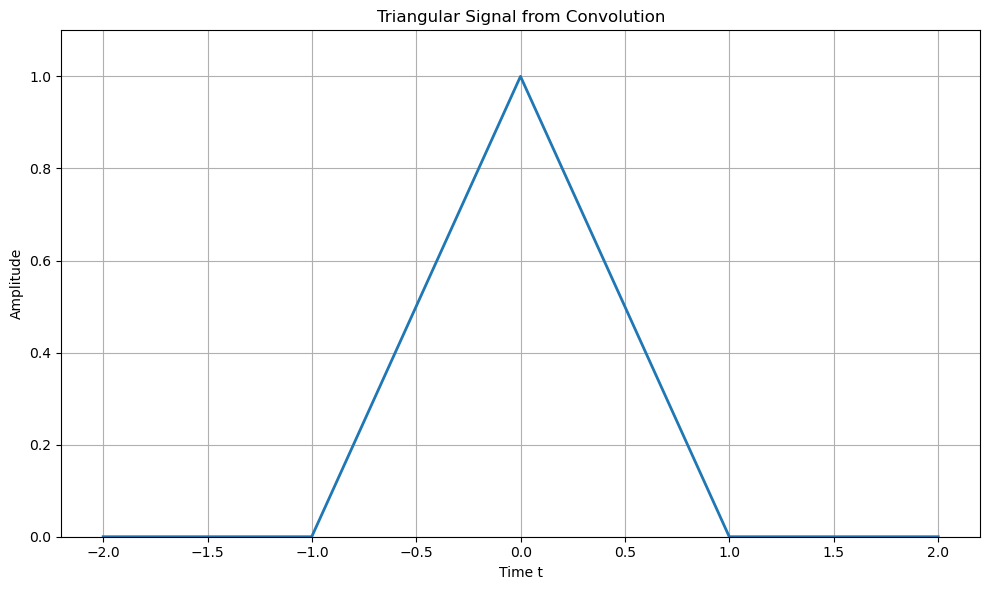

In [7]:
# Convolve the rectangular signal with itself to generate the triangular signal
triangle_t = np.convolve(rect_t, rect_t, mode='full') * dt  # Scale by sample spacing

# Define a new time vector for the convolved signal
t_conv = np.linspace(2 * t[0], 2 * t[-1], len(triangle_t))

# Normalize the triangular signal
triangle_t = triangle_t / np.max(triangle_t)

# Plot for triangular signal
plt.figure(figsize=(10, 6))
plt.plot(t_conv, triangle_t, linewidth=2)
plt.grid(True)
plt.title('Triangular Signal from Convolution')
plt.xlabel('Time t')
plt.ylabel('Amplitude')
plt.ylim([0, 1.1])

# Show the plots
plt.tight_layout()
plt.show()

### Fourier Transform

The **Fourier Transform** is a mathematical operation that transforms a time-domain signal into its frequency-domain representation. It decomposes a signal into its constituent sinusoidal components, providing information about the signal's amplitude and phase at different frequencies.

For a continuous-time signal $x(t)$, the Fourier Transform $X(f)$ is defined as:

$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2 \pi f t} \, dt
$$

where:
- $X(f)$ is the Fourier Transform of $x(t)$,
- $f$ represents the frequency in hertz,
- $j$ is the imaginary unit ($j^2 = -1$).

The inverse Fourier Transform reconstructs the time-domain signal from its frequency-domain representation:

$$
x(t) = \int_{-\infty}^{\infty} X(f) e^{j 2 \pi f t} \, df
$$

#### Key Features:
- The Fourier Transform converts time-domain signals into their frequency-domain components, making it easier to analyze signals in terms of their spectral content.
- It is widely used in engineering, physics, and signal processing for analyzing systems and signals.

#### Python Simulation

We utilize the `rect_t` signal simulated above.

For the theoretical Fourier Transform of a rectangular pulse, we use a rectangular pulse of duration $T$, the theoretical Fourier Transform is:

$$
\text{FT}(\Pi(t)) = T \cdot \text{sinc}(f \cdot T)
$$

where:
- $T$ is the duration of the rectangular pulse.
- $\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}$.

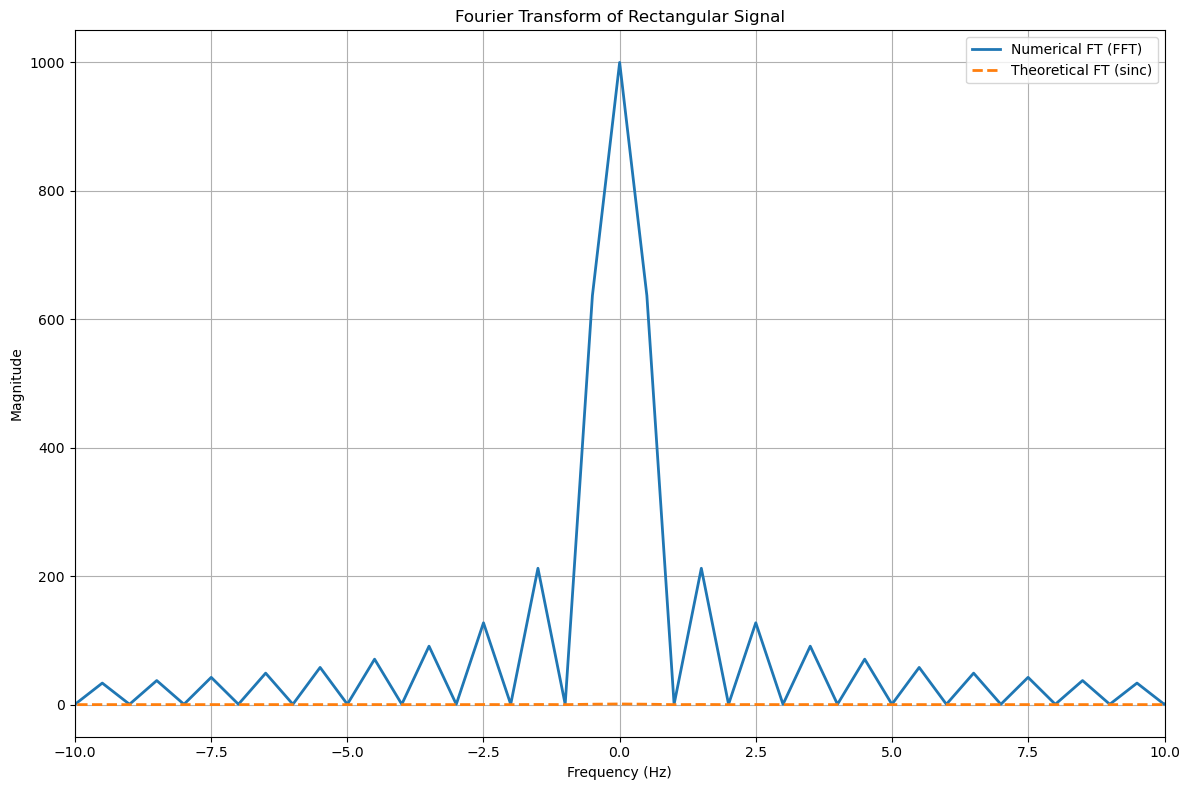

In [8]:
# Compute the numerical Fourier Transform of the rectangular signal using FFT
N = len(rect_t)  # Number of points in the signal
frequencies = np.fft.fftfreq(N, dt)  # Frequency vector
fft_rect = np.fft.fft(rect_t)  # FFT of the rectangular signal
fft_rect_magnitude = np.abs(fft_rect)  # Magnitude of the FFT

# Sort frequencies and corresponding FFT results for better visualization
sorted_indices = np.argsort(frequencies)
frequencies = frequencies[sorted_indices]
fft_rect_magnitude = fft_rect_magnitude[sorted_indices]

# Define the theoretical Fourier Transform using the sinc function
theoretical_ft = T * np.sinc(frequencies * T)

# Plot the Fourier Transform
plt.figure(figsize=(12, 8))

# Subplot for numerical and theoretical Fourier Transform
plt.plot(frequencies, fft_rect_magnitude, linewidth=2, label='Numerical FT (FFT)')
plt.plot(frequencies, np.abs(theoretical_ft), linewidth=2, linestyle='--', label='Theoretical FT (sinc)')
plt.grid(True)
plt.title('Fourier Transform of Rectangular Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([-10, 10])  # Focus on lower frequencies
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


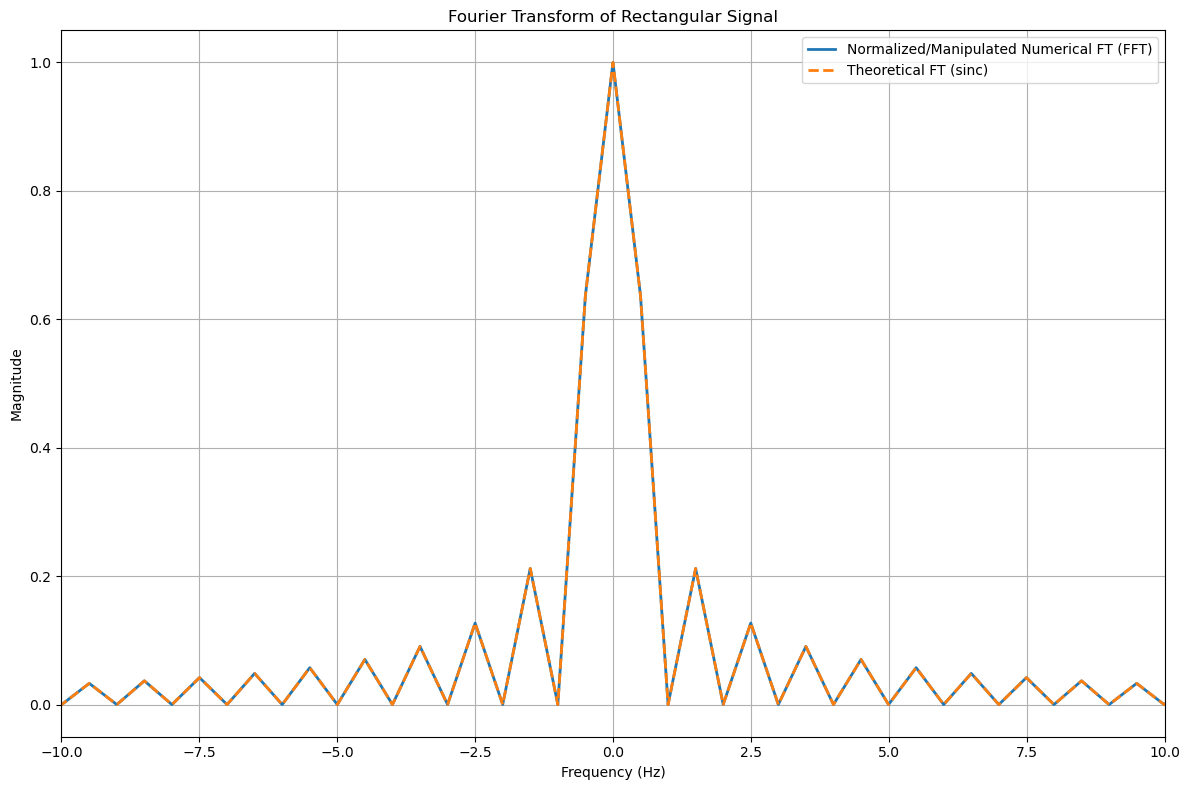

In [9]:
# Normalize the numerical Fourier Transform to match the theoretical FT
fft_rect_magnitude = fft_rect_magnitude / np.max(fft_rect_magnitude) * T

# Sort frequencies and corresponding FFT results for better visualization
sorted_indices = np.argsort(frequencies)
frequencies = frequencies[sorted_indices]
fft_rect_magnitude = fft_rect_magnitude[sorted_indices]

# Define the theoretical Fourier Transform using the sinc function
theoretical_ft = T * np.sinc(frequencies * T)

# Plot the normalized Fourier Transform
plt.figure(figsize=(12, 8))
plt.plot(frequencies, fft_rect_magnitude, linewidth=2, label='Normalized/Manipulated Numerical FT (FFT)')
plt.plot(frequencies, np.abs(theoretical_ft), linewidth=2, linestyle='--', label='Theoretical FT (sinc)')
plt.grid(True)
plt.title('Fourier Transform of Rectangular Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([-10, 10])  # Focus on lower frequencies
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**Zero-Padding the Signal**

Adding zeros to the signal increases the number of points in the FFT computation, leading to a higher resolution in the frequency domain. This does not alter the actual spectrum but makes the plot appear smoother.


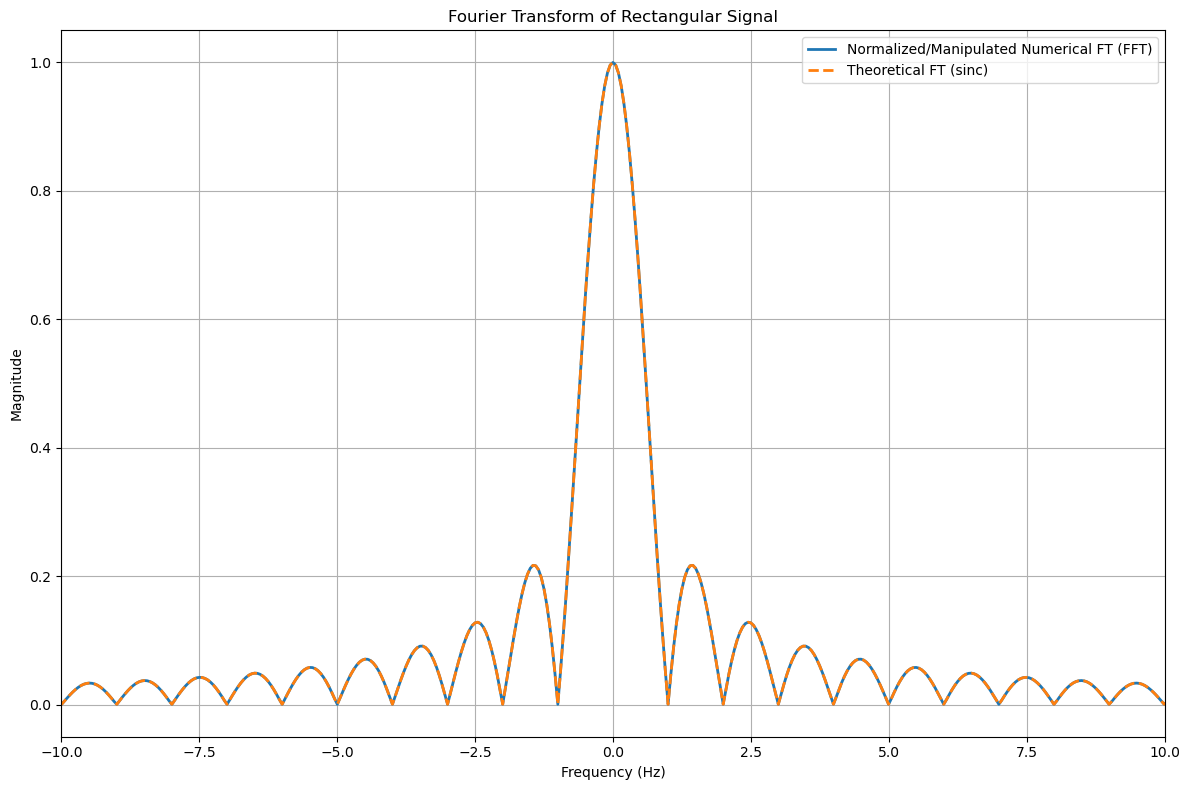

In [10]:
# Apply zero-padding to the rectangular signal
padding_length = 10 * len(rect_t)  # Add zeros to make the signal length 10 times longer
fft_rect = np.fft.fft(rect_t, n=padding_length)  # FFT with zero-padding
frequencies = np.fft.fftfreq(padding_length, dt)  # Adjusted frequency vector
fft_rect_magnitude = np.abs(fft_rect)  # Magnitude of the FFT

# Normalize the numerical Fourier Transform to match the theoretical FT
fft_rect_magnitude = fft_rect_magnitude / np.max(fft_rect_magnitude) * T

# Sort frequencies and corresponding FFT results for better visualization
sorted_indices = np.argsort(frequencies)
frequencies = frequencies[sorted_indices]
fft_rect_magnitude = fft_rect_magnitude[sorted_indices]

# Define the theoretical Fourier Transform using the sinc function
theoretical_ft = T * np.sinc(frequencies * T)

# Plot the rectangular signal and Fourier Transform
plt.figure(figsize=(12, 8))
plt.plot(frequencies, fft_rect_magnitude, linewidth=2, label='Normalized/Manipulated Numerical FT (FFT)')
plt.plot(frequencies, np.abs(theoretical_ft), linewidth=2, linestyle='--', label='Theoretical FT (sinc)')
plt.grid(True)
plt.title('Fourier Transform of Rectangular Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([-10, 10])  # Focus on lower frequencies
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Key Properties of the Fourier Transform

**Linearity** 

$$
\mathcal{F}\{\alpha x_1(t) + \beta x_2(t)\} = \alpha X_1(f) + \beta X_2(f)
$$

The Fourier Transform of a linear combination of signals is the same linear combination of their individual Fourier Transforms.


**Duality**  

$$
\mathcal{F}\{X(t)\} = x(-f)
$$

The roles of the time and frequency domains are interchangeable under duality.

**Conjugacy**

$$
\mathcal{F}\{x^*(t)\} = X^*(-f)
$$

The Fourier Transform of the complex conjugate of a signal is the conjugate of its Fourier Transform with a reversed frequency.

**Time-Scaling**

$$
\mathcal{F}\{x(at)\} = \frac{1}{|a|} X\left(\frac{f}{a}\right)
$$

Scaling the time-domain signal compresses or stretches its frequency-domain representation inversely.

**Time-Shift**

$$
\mathcal{F}\{x(t - t_0)\} = e^{-j2\pi f t_0} X(f)
$$

Shifting a signal in time introduces a phase shift in the frequency domain.

**Modulation**

$$
\mathcal{F}\{e^{j2\pi f_0 t} x(t)\} = X(f - f_0)
$$

Multiplying a signal by a complex exponential shifts its spectrum in frequency.

**Convolution**

$$
\mathcal{F}\{x(t) \ast y(t)\} = X(f) Y(f)
$$

The Fourier Transform of the convolution of two signals is the product of their Fourier Transforms.

**Multiplication**

$$
\mathcal{F}\{x(t)y(t)\} = X(f) \ast Y(f)
$$

The Fourier Transform of the product of two signals is the convolution of their Fourier Transforms.

**Differentiation**

$$
\mathcal{F}\left\{\frac{d^n x(t)}{dt^n}\right\} = (j2\pi f)^n X(f)
$$
Differentiating a signal $n$ times in the time domain multiplies its Fourier Transform by $(j2\pi f)^n$.

**Differentiation in Frequency**

$$
\mathcal{F}\{t^n x(t)\} = \left(\frac{j}{2\pi}\right)^n \frac{d^n X(f)}{df^n}
$$

Multiplying a signal by $t^n$ in the time domain corresponds to $n$-th order differentiation of its Fourier Transform.

**Integration**

$$
\mathcal{F}\left\{\int_{-\infty}^{t} x(\tau) d\tau\right\} = \frac{X(f)}{j2\pi f} + \frac{1}{2} X(0)\delta(f)
$$

Integration in the time domain introduces a scaling factor in the frequency domain.

**Parseval's Theorem**

$$
\int_{-\infty}^{\infty} x(t) y^*(t) dt = \int_{-\infty}^{\infty} X(f) Y^*(f) df
$$

The energy of the signal in the time domain equals the energy in the frequency domain.

**Rayleigh's Theorem**

$$
\int_{-\infty}^{\infty} |x(t)|^2 dt = \int_{-\infty}^{\infty} |X(f)|^2 df
$$

The total energy of the signal is conserved between the time and frequency domains.



### Fourier Transform Pairs

Fundamental relationships between signals in the time domain and their counterparts in the frequency domain.

**Impulse and Constant Functions**

$$
\delta(t) \overset{\mathcal{F}}{\longleftrightarrow} 1
$$

$$
1 \overset{\mathcal{F}}{\longleftrightarrow} \delta(f)
$$

$$
\delta(t - t_0) \overset{\mathcal{F}}{\longleftrightarrow} e^{-j2\pi f t_0}
$$

**Exponential and Trigonometric Functions**

$$
e^{j2\pi f_0 t} \overset{\mathcal{F}}{\longleftrightarrow} \delta(f - f_0)
$$

$$
\cos(2\pi f_0 t) \overset{\mathcal{F}}{\longleftrightarrow} \frac{1}{2}\delta(f - f_0) + \frac{1}{2}\delta(f + f_0)
$$

$$
\sin(2\pi f_0 t) \overset{\mathcal{F}}{\longleftrightarrow} \frac{1}{2j}\delta(f - f_0) - \frac{1}{2j}\delta(f + f_0)
$$

**Rectangular, Sinc, and Triangular Functions**

$$
\Pi(t) \overset{\mathcal{F}}{\longleftrightarrow} \text{sinc}(f)
$$

$$
\text{sinc}(t) \overset{\mathcal{F}}{\longleftrightarrow} \Pi(f)
$$

$$
\Lambda(t) \overset{\mathcal{F}}{\longleftrightarrow} \text{sinc}^2(f)
$$

$$
\text{sinc}^2(t) \overset{\mathcal{F}}{\longleftrightarrow} \Lambda(f)
$$

**Exponentially Decaying Signals**

$$
e^{-\alpha t} u_{-1}(t), \alpha > 0 \overset{\mathcal{F}}{\longleftrightarrow} \frac{1}{\alpha + j2\pi f}
$$

$$
t e^{-\alpha t} u_{-1}(t), \alpha > 0 \overset{\mathcal{F}}{\longleftrightarrow} \frac{1}{(\alpha + j2\pi f)^2}
$$

$$
e^{-\alpha|t|}, \alpha > 0 \overset{\mathcal{F}}{\longleftrightarrow} \frac{2\alpha}{\alpha^2 + (2\pi f)^2}
$$

$$
e^{-\pi t^2} \overset{\mathcal{F}}{\longleftrightarrow} e^{-\pi f^2}
$$

**Step and Sign Functions**

$$
\text{sgn}(t) \overset{\mathcal{F}}{\longleftrightarrow} \frac{1}{j\pi f}
$$

$$
u_{-1}(t) \overset{\mathcal{F}}{\longleftrightarrow} \frac{1}{2}\delta(f) + \frac{1}{j2\pi f}
$$

**Differentiation and Higher-Order Operations**

$$
\delta'(t) \overset{\mathcal{F}}{\longleftrightarrow} j2\pi f
$$

$$
\delta^{(n)}(t) \overset{\mathcal{F}}{\longleftrightarrow} (j2\pi f)^n
$$

$$
\frac{1}{t} \overset{\mathcal{F}}{\longleftrightarrow} -j\pi \text{sgn}(f)
$$

**Periodic Impulse Train**

$$
\sum_{n=-\infty}^{\infty} \delta(t - nT_0) \overset{\mathcal{F}}{\longleftrightarrow} \frac{1}{T_0} \sum_{n=-\infty}^{\infty} \delta\left(f - \frac{n}{T_0}\right)
$$